___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

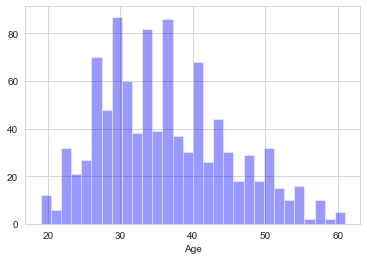

In [6]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'].dropna(),kde=False, color='blue',bins=30)

**Create a jointplot showing Area Income versus Age.**

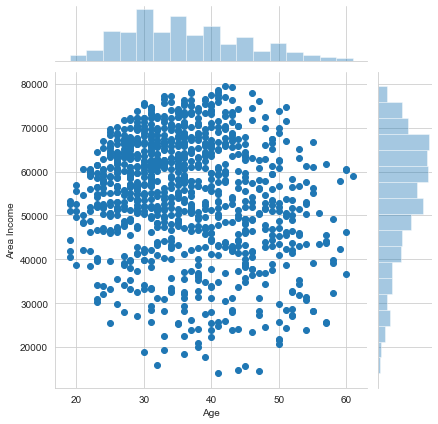

In [7]:

sns.jointplot(x='Age',y='Area Income',data=ad_data,dropna=True,marker='o')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

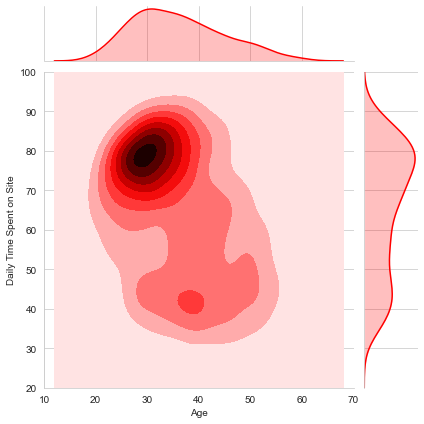

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data, kind='kde',color='red',xlim=(10,70),ylim=(20,100))

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

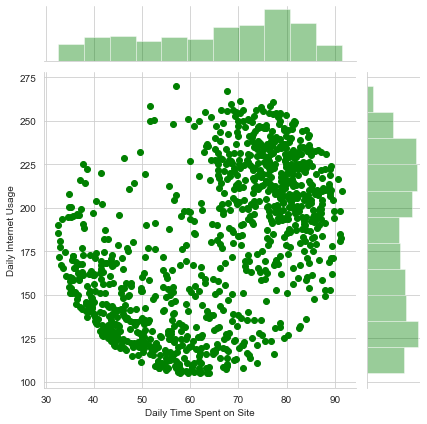

In [9]:

sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,dropna=True,marker='o',color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

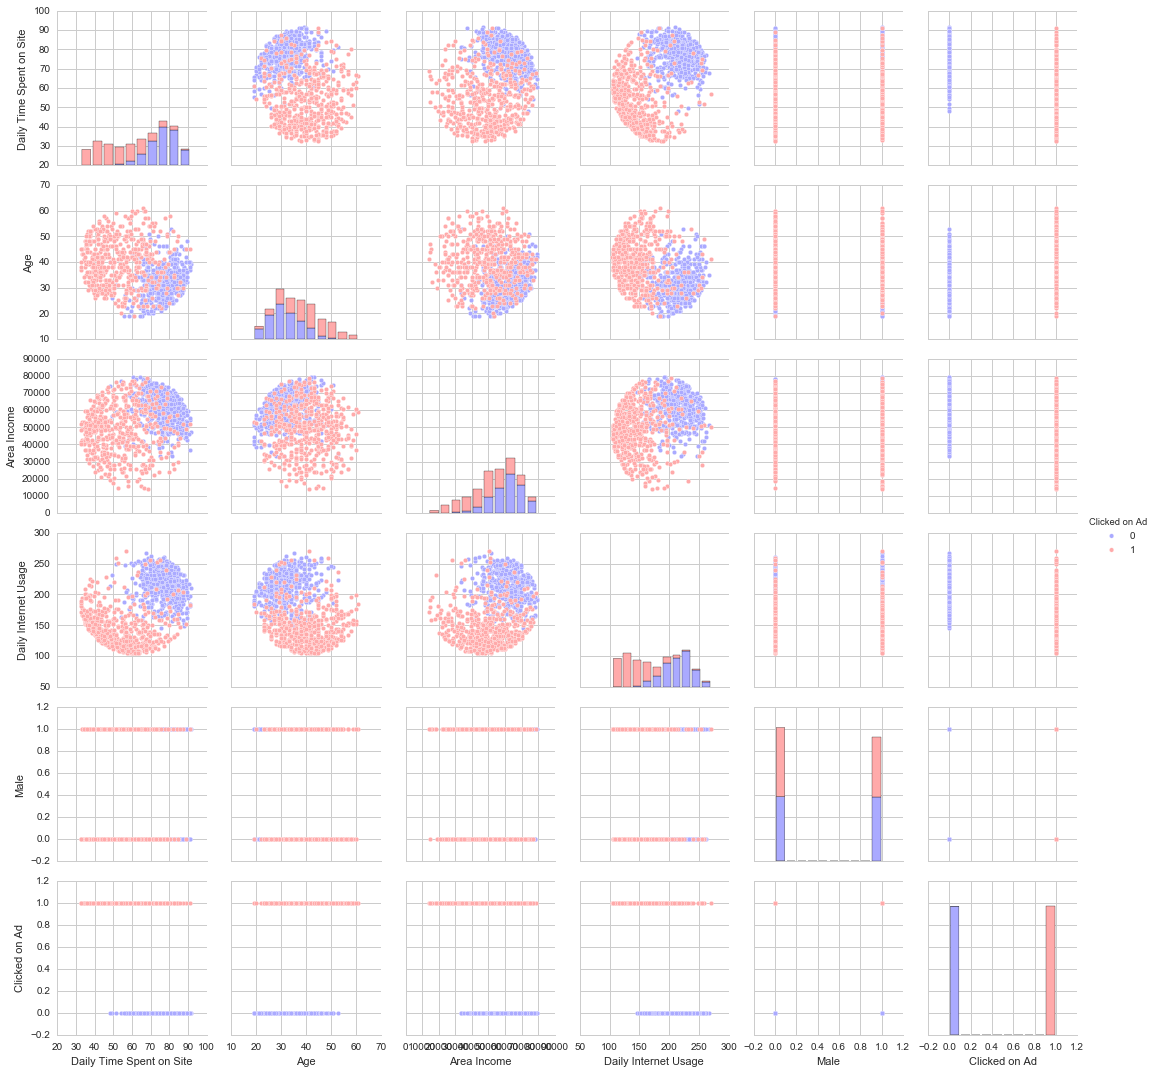

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [10]:

ad_data['Country code'] = ad_data.Country.astype('category').cat.codes

In [11]:
ad_data[ad_data['Country code'] ==10].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code
728,89.66,34,52802.58,171.23,Advanced didactic conglomeration,Nicholasport,1,Armenia,2016-02-03 15:15:42,0,10
868,67.71,25,63430.33,225.76,Synergized intangible open system,Daviesborough,1,Armenia,2016-04-28 02:55:10,0,10
876,67.39,44,51257.26,107.19,Realigned intermediate application,Josephberg,0,Armenia,2016-01-24 13:41:38,1,10


In [12]:
ad_data.City.astype('category').cat.codes

0      961
1      903
2      111
3      939
4      805
      ... 
995    126
996    488
997    798
998    935
999    744
Length: 1000, dtype: int16

** Train and fit a logistic regression model on the training set.**

In [14]:
ad_data['City'].unique()

array(['Wrightburgh', 'West Jodi', 'Davidton', 'West Terrifurt',
       'South Manuel', 'Jamieberg', 'Brandonstad', 'Port Jefferybury',
       'West Colin', 'Ramirezton', 'West Brandonton', 'East Theresashire',
       'West Katiefurt', 'North Tara', 'West William', 'New Travistown',
       'West Dylanberg', 'Pruittmouth', 'Jessicastad', 'Millertown',
       'Port Jacqueline', 'Lake Nicole', 'South John', 'Pamelamouth',
       'Harperborough', 'Port Danielleberg', 'West Jeremyside',
       'South Cathyfurt', 'Palmerside', 'West Guybury', 'Phelpschester',
       'Lake Melindamouth', 'North Richardburgh', 'Port Cassie',
       'New Thomas', 'Johnstad', 'West Aprilport', 'Kellytown',
       'Charlesport', 'Millerchester', 'Mackenziemouth', 'Zacharystad',
       'North Joshua', 'Bowenview', 'Jamesberg', 'Lake Cassandraport',
       'New Sharon', 'Johnport', 'Hamiltonfort', 'West Christopher',
       'Hollandberg', 'Odomville', 'East Samanthashire', 'South Lauraton',
       'Amandahaven', 'T

In [18]:
ad_data['City code'] = ad_data.City.astype('category').cat.codes

In [17]:
ad_data[ad_data['City code'] == 111].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code
2,69.47,26,59785.94,236.5,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111


In [20]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,805


In [21]:
ad_data['Hour'] = ad_data.apply(lambda x: x['Timestamp'].hour, axis=1) #using DateTime objects
ad_data['Month'] = ad_data.apply(lambda x: x['Timestamp'].month, axis=1) 
ad_data['Day'] = ad_data.apply(lambda x: x['Timestamp'].day, axis=1)

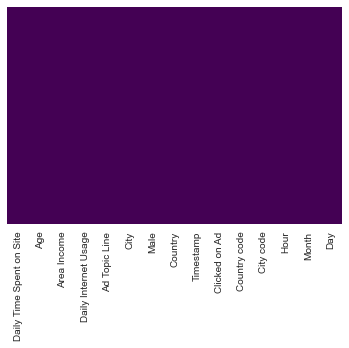

In [22]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
ad_data_cleaned = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male','Country code','City code','Hour','Month','Day', 'Clicked on Ad']]

In [24]:
from sklearn.model_selection import train_test_split

In [26]:

X_train, X_test, y_train, y_test = train_test_split(ad_data_cleaned.drop('Clicked on Ad',axis=1),ad_data['Clicked on Ad'], test_size=0.30, random_state=101)


In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\biren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [30]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [31]:
from sklearn.metrics import classification_report

In [32]:
z=classification_report(y_test,predictions)

In [33]:
z


'              precision    recall  f1-score   support\n\n           0       0.92      0.95      0.93       157\n           1       0.94      0.91      0.93       143\n\n    accuracy                           0.93       300\n   macro avg       0.93      0.93      0.93       300\nweighted avg       0.93      0.93      0.93       300\n'

## Great Job!